# Normal Task: Analyze customer behavior based on transaction data

**Develop a data analysis project that focuses on understanding and analyzing
customer behavior based on transactional data. The goal is to perform Exploratory
Data Analysis (EDA) to derive valuable insights into customer preferences,
purchasing patterns, and overall behavior.**

1. Data Collection and Initial Exploration
2. Data Cleaning
3. Data Transformation
4. Univariate Analysis
5. Bivariate Analysis
6. Multivariate Analysis
7. Customer Segmentation
8. Time Series Analysis
9. Visualization
10. Insight Generation & Reporting

# Import Necessary Libraries

In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time manipulation
from datetime import datetime

# Machine learning for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualization for PCA
from mpl_toolkits.mplot3d import Axes3D

# Interactive visualization (optional)
import plotly.express as px
import plotly.graph_objects as go

# Statistics
from scipy import stats


**Explanation of Imports:**
* `pandas` and `numpy`: Essential for data manipulation and numerical operations.
* `matplotlib.pyplot` and `seaborn`: Key libraries for creating a wide range of static visualizations.
* `datetime`: Useful for manipulating date and time data.
* `sklearn.cluster.KMeans` and `sklearn.decomposition.PCA`: Necessary for performing clustering and principal component analysis.
* `mpl_toolkits.mplot3d.Axes3D`: Enables 3D plotting for multivariate analysis.
* `plotly.express` and `plotly.graph_objects`: Provides tools for creating interactive visualizations and dashboards.
* `scipy.stats`: Contains statistical functions that may be useful for data analysis.


# 1. Data Collection and Initial Exploration

**Task Description:**

In this step, we will load the transactional dataset into our analysis environment using a data manipulation library like pandas. We'll display the first few rows to get an overview of the dataset and its structure. By summarizing the dataset with basic statistics, we will gain an initial understanding of key metrics.

In [ ]:
data = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Ideal_Data.csv')
data.head()

In [ ]:
data1 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Mapping_File.csv')
data1

In [ ]:
data2 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Validation_Data.csv')
data2.head()

In [ ]:
data3 = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv')
data3.head()

In [ ]:
data.shape, data1.shape, data2.shape, data3.shape

In [ ]:
data.columns, data1.columns, data2.columns, data3.columns

# EDA on Hackton Working Data

In [6]:
df = pd.read_csv('/kaggle/input/store-transaction-data/Hackathon_Working_Data.csv')

# Display the first few rows
print("Initial Data:")
df.head()

Initial Data:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [7]:
# Summary statistics
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
count,26985,26985,26985.000000,26985,26985.000000,26985.000000,26985.000000,26985.000000,26985,26985,26985,26985,26985,26985
unique,3,10,NaN,6424,NaN,NaN,NaN,NaN,80,174,232,354,643,1315
top,M3,N7,NaN,T1521,NaN,NaN,NaN,NaN,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,MARIE GOLD,MARIE GOLD REGULAR
freq,9430,5625,NaN,44,NaN,NaN,NaN,NaN,6677,1954,1954,3147,977,786
mean,NaN,NaN,15.167019,NaN,278.754206,4.105021,67.808551,52.812982,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.956057,NaN,541.398504,95.666947,118.005978,84.987730,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,40.000000,1.000000,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,14.000000,NaN,111.000000,1.000000,30.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.000000,NaN,280.000000,2.000000,80.000000,64.000000,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning

**Task Description:**

Data cleaning involves identifying and handling missing values and duplicate records in the dataset. We will ensure that each column has the correct data type, such as converting MONTH and DAY to datetime objects and QTY and VALUE to numeric types. Additionally, we'll address any inconsistencies in column names and formats to maintain data integrity and prepare the dataset for analysis.


In [8]:
# Check for duplicates
duplicates = df.duplicated()
print("\nDuplicate Rows:")
df[duplicates]


Duplicate Rows:


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
516,M1,N1,8,T840,105.0,1.0,15.0,15.0,BREAKFAST CEREALS,HOT CEREALS,OATS,PEPSICO INDIA,QUAKER,QUAKER OATS
670,M1,N1,9,T987,105.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
1119,M1,N1,12,T1376,130.0,1.0,5.0,5.0,CONFECTIONERY - TOFFEE/HBC,TOFFEES,TOFFEES,PERFETTI VAN MELLE,CHUPA CHUPS,CHUPA CHUPS SOUR BELT
2032,M1,N1,26,T3026,40.0,1.0,10.0,10.0,VERMICELLI & NOODLE,INSTANT NOODLES,INSTANT NOODLES,CAPITAL FOODS,CHING'S SECRET,CHING'S SECRET
2298,M1,N1,29,T3372,350.0,1.0,160.0,160.0,CHOCOLATE,MOULDED,MOULDED,MONDELEZ INTERNATIONAL,CADBURY DAIRY MILK,DAIRY MILK SILK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26516,M3,N10,2,T4962,50.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,SALT CRACKER,SALT CRACKER,PARLE PRODS,MONACO,MONACO
26615,M3,N10,4,T5163,915.0,2.0,280.0,140.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR
26616,M3,N10,4,T5163,915.0,2.0,280.0,140.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR
26718,M3,N10,11,T5389,65.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,SALT CRACKER,SALT CRACKER,PARLE PRODS,MONACO,MONACO


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [11]:
# Ensure correct data types
df['MONTH'] = df['MONTH'].astype('category')
df['STORECODE'] = df['STORECODE'].astype('category')
df['GRP'] = df['GRP'].astype('category')
df['SGRP'] = df['SGRP'].astype('category')
df['SSGRP'] = df['SSGRP'].astype('category')
df['CMP'] = df['CMP'].astype('category')
df['MBRD'] = df['MBRD'].astype('category')
df['BRD'] = df['BRD'].astype('category')
df['DAY'] = df['DAY'].astype(int)
df['QTY'] = df['QTY'].astype(int)
df['VALUE'] = df['VALUE'].astype(float)
df['BILL_AMT'] = df['BILL_AMT'].astype(float)
df['PRICE'] = df['PRICE'].astype(float)

# Display data types to verify
print("\nData Types after Conversion:")
print(df.dtypes)


Data Types after Conversion:
MONTH        category
STORECODE    category
DAY             int64
BILL_ID        object
BILL_AMT      float64
QTY             int64
VALUE         float64
PRICE         float64
GRP          category
SGRP         category
SSGRP        category
CMP          category
MBRD         category
BRD          category
dtype: object


# 3. Data Transformation

In this step, we will perform necessary data transformations to enhance the dataset. This includes converting date-related columns into datetime objects and extracting features such as the day of the week. We will also encode categorical variables (e.g., GRP, SGRP, SSGRP) into numerical values. Additionally, we will create new features like the average bill amount per store and total sales per month to provide more insights during analysis.

In [12]:
# Convert MONTH column to actual month numbers
df['MONTH_NUM'] = df['MONTH'].str.extract('(\d+)').astype(int)

# Ensure valid date construction
df['DATE'] = pd.to_datetime(df['MONTH_NUM'].astype(str) + '-' + df['DAY'].astype(str), format='%m-%d', errors='coerce')

# Extracting additional features from the DATE
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()
df['MONTH_NUM'] = df['DATE'].dt.month

# Encoding categorical variables
df['GRP_CODE'] = df['GRP'].cat.codes
df['SGRP_CODE'] = df['SGRP'].cat.codes
df['SSGRP_CODE'] = df['SSGRP'].cat.codes
df['CMP_CODE'] = df['CMP'].cat.codes
df['MBRD_CODE'] = df['MBRD'].cat.codes
df['BRD_CODE'] = df['BRD'].cat.codes

# Creating new features
df['AVG_BILL_AMT_PER_STORE'] = df.groupby('STORECODE')['BILL_AMT'].transform('mean')
df['TOTAL_SALES_PER_MONTH'] = df.groupby('MONTH')['VALUE'].transform('sum')

# Display the transformed DataFrame
print("\nTransformed DataFrame:")
df.head()



Transformed DataFrame:


/tmp/ipykernel_94/3696475150.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['AVG_BILL_AMT_PER_STORE'] = df.groupby('STORECODE')['BILL_AMT'].transform('mean')
/tmp/ipykernel_94/3696475150.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['TOTAL_SALES_PER_MONTH'] = df.groupby('MONTH')['VALUE'].transform('sum')


,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,...,DATE,DAY_OF_WEEK,GRP_CODE,SGRP_CODE,SSGRP_CODE,CMP_CODE,MBRD_CODE,BRD_CODE,AVG_BILL_AMT_PER_STORE,TOTAL_SALES_PER_MONTH
0,M1,N1,4,T375,225.0,1,225.0,225.0,BUTTER MARGR (4/94),BUTTER,...,1900-01-04,Thursday,14,25,191,90,18,39,136.693166,552545.32
1,M1,N1,4,T379,95.0,1,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,...,1900-01-04,Thursday,26,40,51,233,345,783,136.693166,552545.32
2,M1,N1,4,T381,10.0,1,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,...,1900-01-04,Thursday,16,32,42,206,66,142,136.693166,552545.32
3,M1,N1,4,T382,108.0,1,108.0,108.0,PACKAGED TEA,MAIN PACKS,...,1900-01-04,Thursday,52,88,119,114,624,1277,136.693166,552545.32
4,M1,N1,4,T384,19.0,1,19.0,19.0,ALL IODISED SALT,POWDERED SALT,...,1900-01-04,Thursday,3,121,169,315,578,1197,136.693166,552545.32


# 4. Univariate Analysis

Univariate analysis focuses on examining the distribution and summary statistics of individual variables. For numerical columns (QTY, VALUE, BILL_AMT, PRICE), we will compute central tendency and dispersion measures, and visualize their distributions using histograms and box plots. For categorical columns (GRP, SGRP, SSGRP), we will use count plots to understand their frequency distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


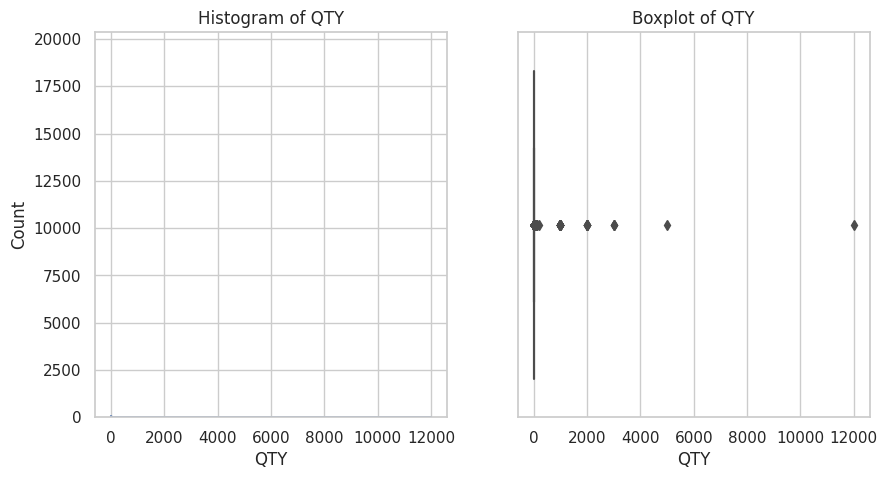

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


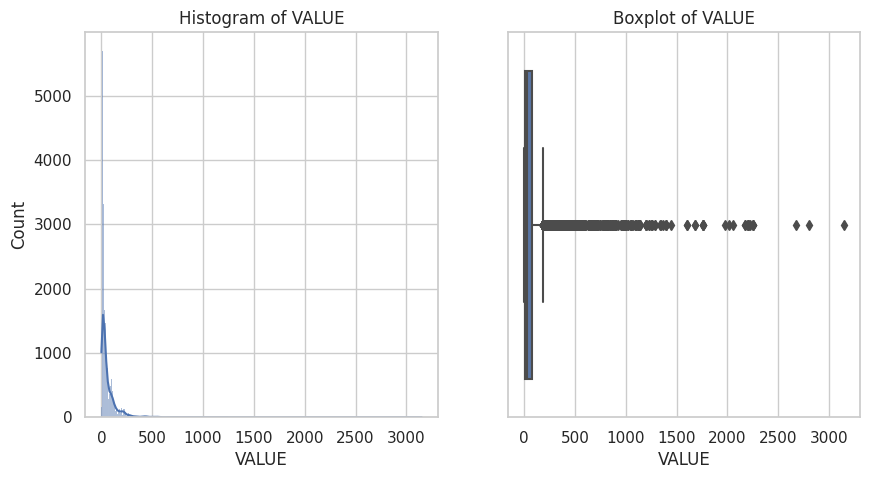

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


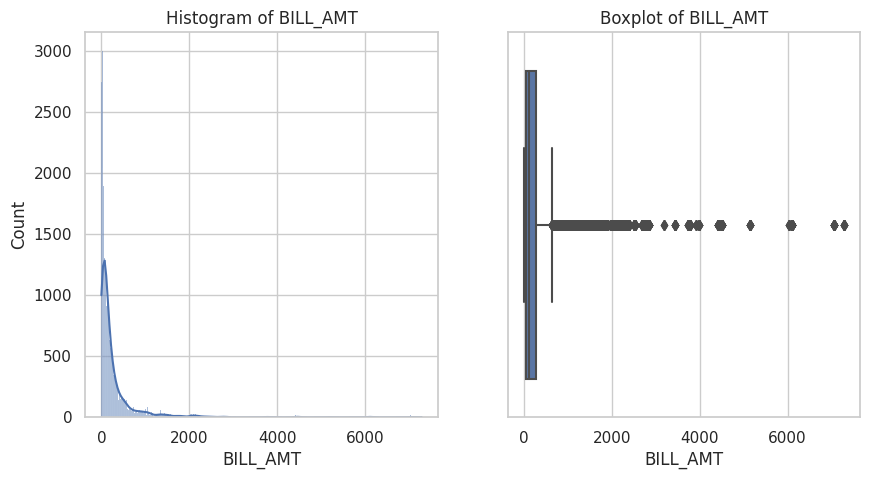

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


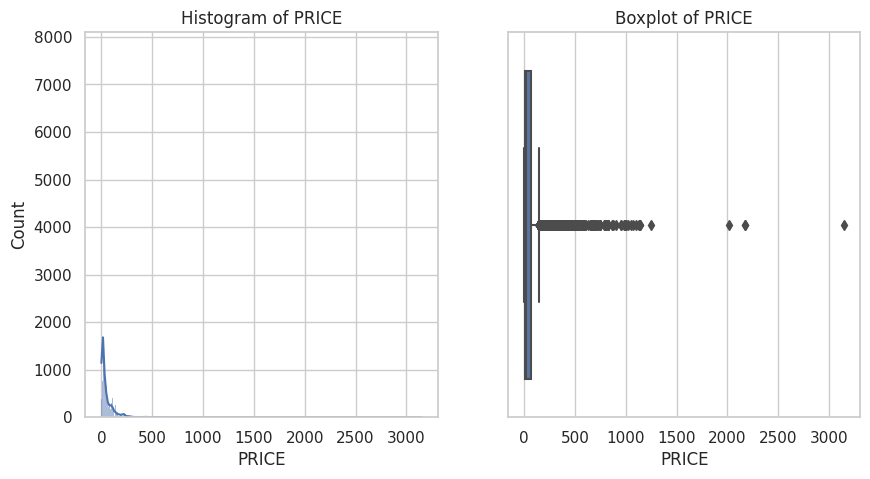

In [13]:
# Setting up the visualisation style
sns.set(style='whitegrid')

# Univariate Analysis for Numerical Columns
numerical_cols = ['QTY', 'VALUE', 'BILL_AMT', 'PRICE']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


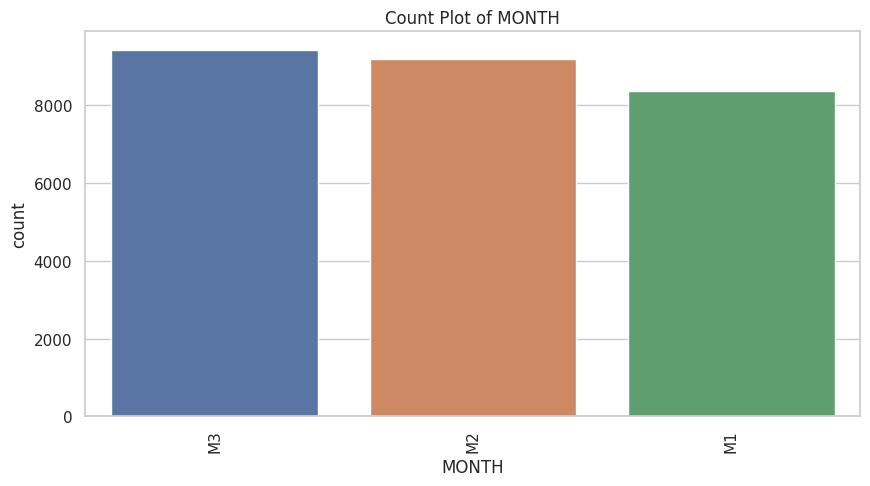

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


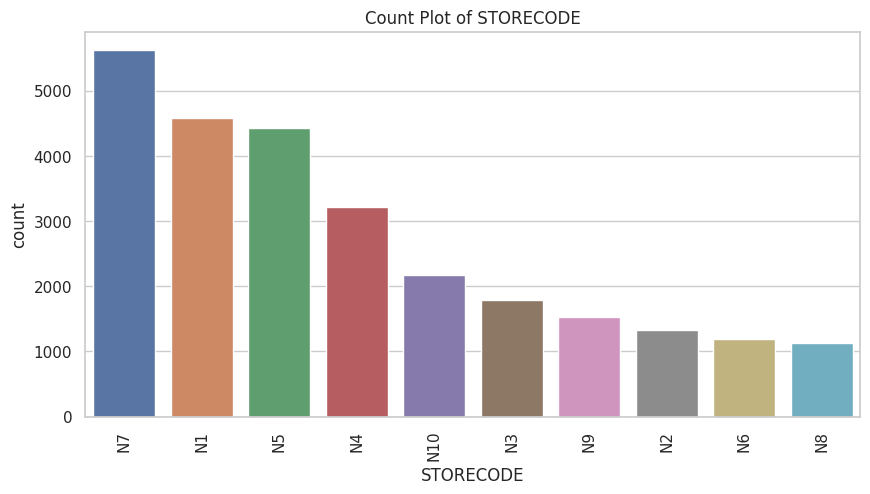

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


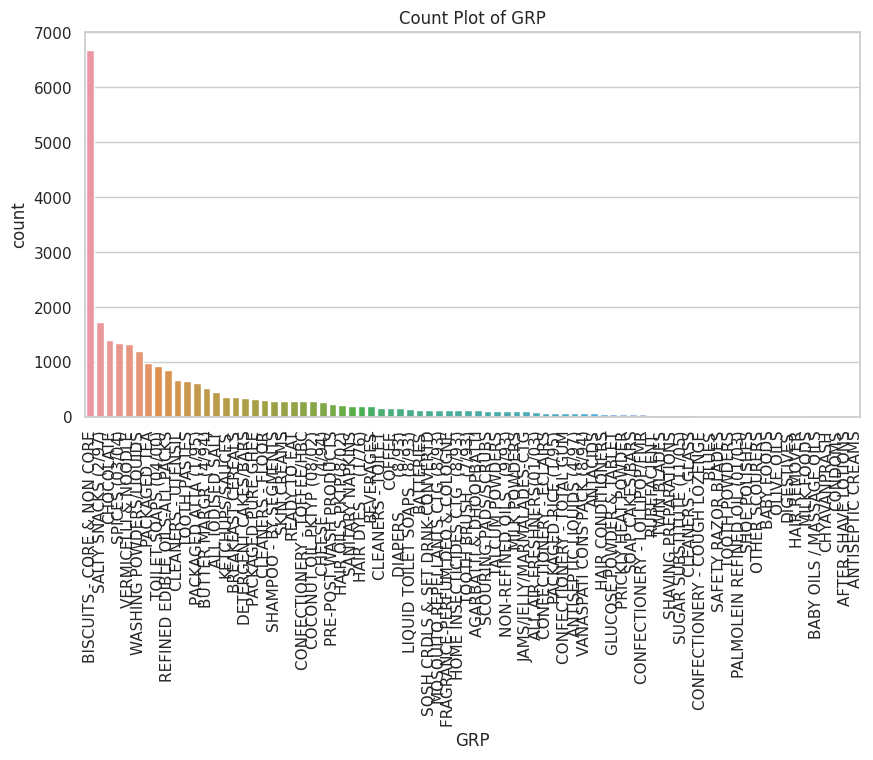

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


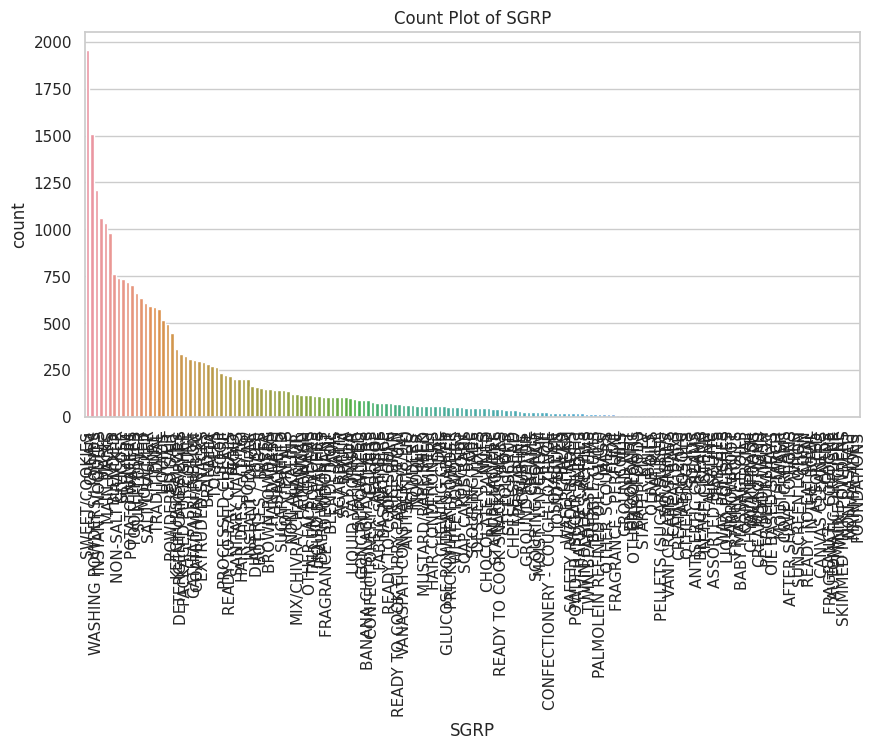

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


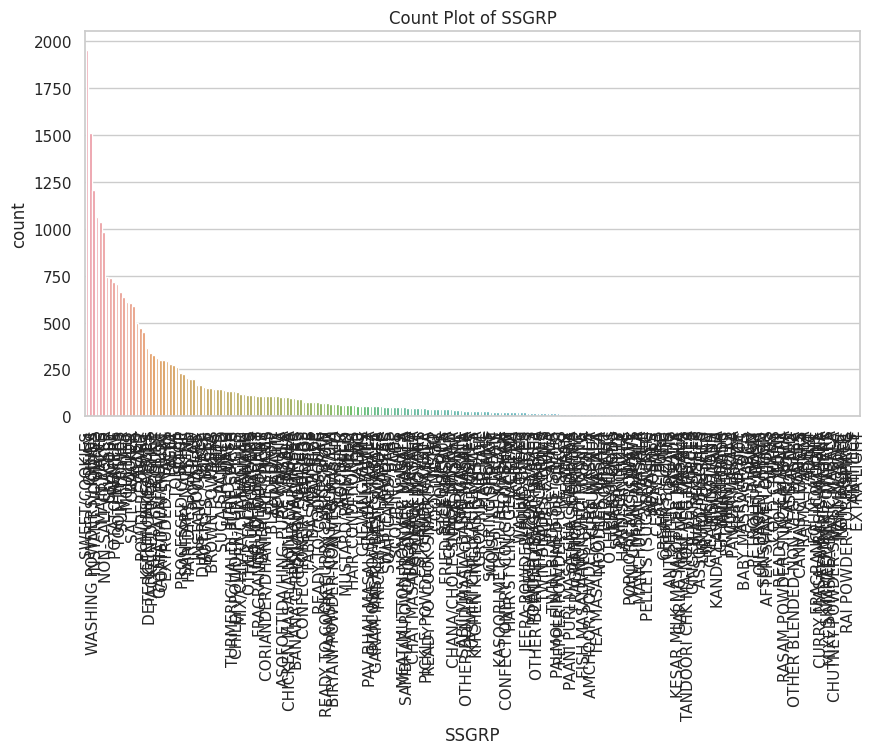

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


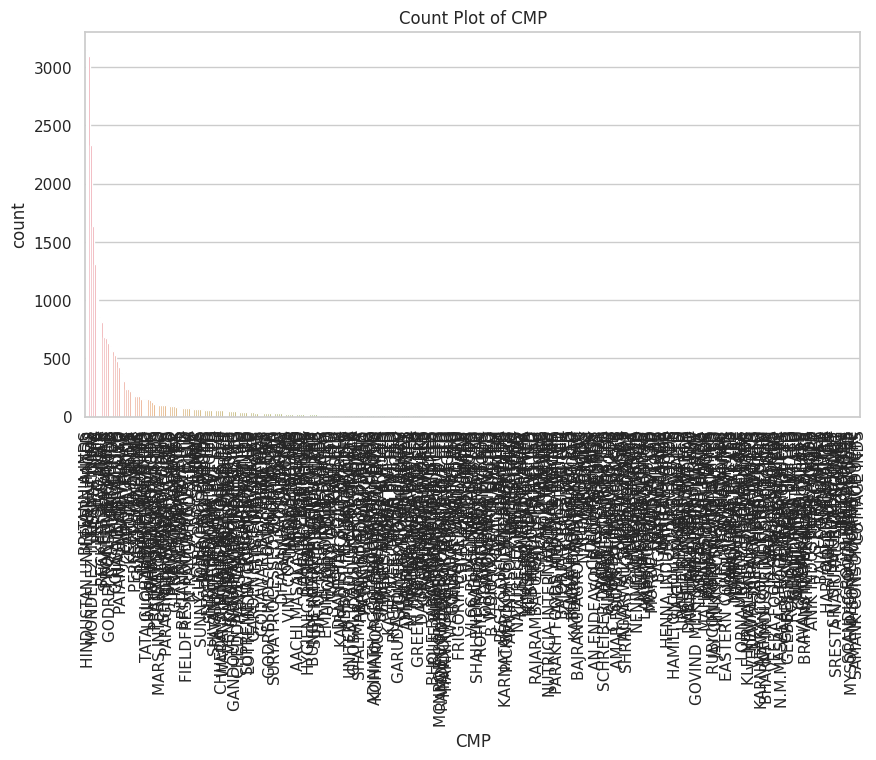

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


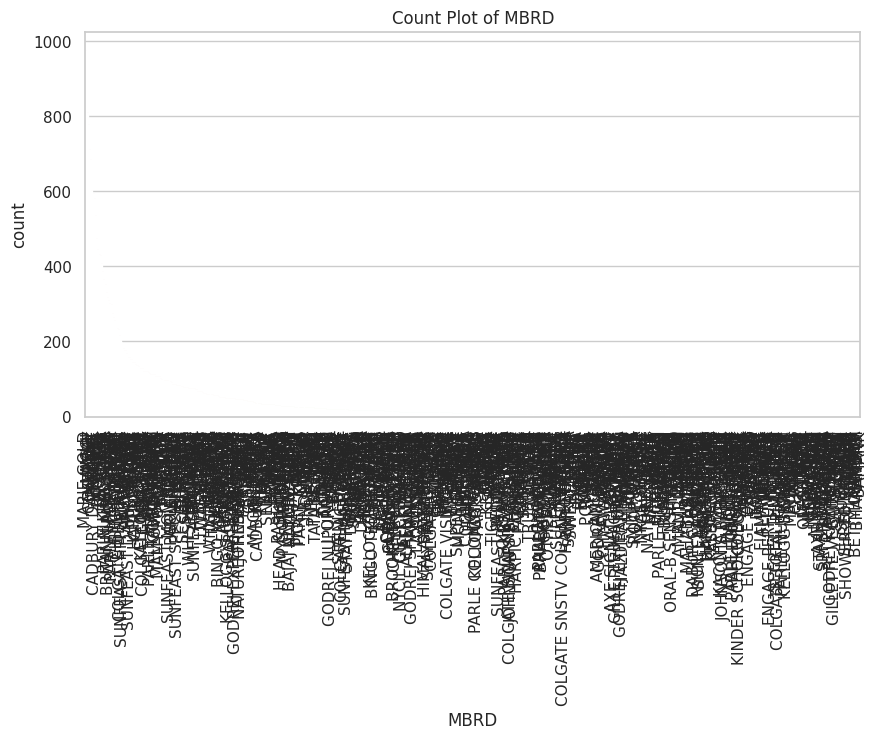

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


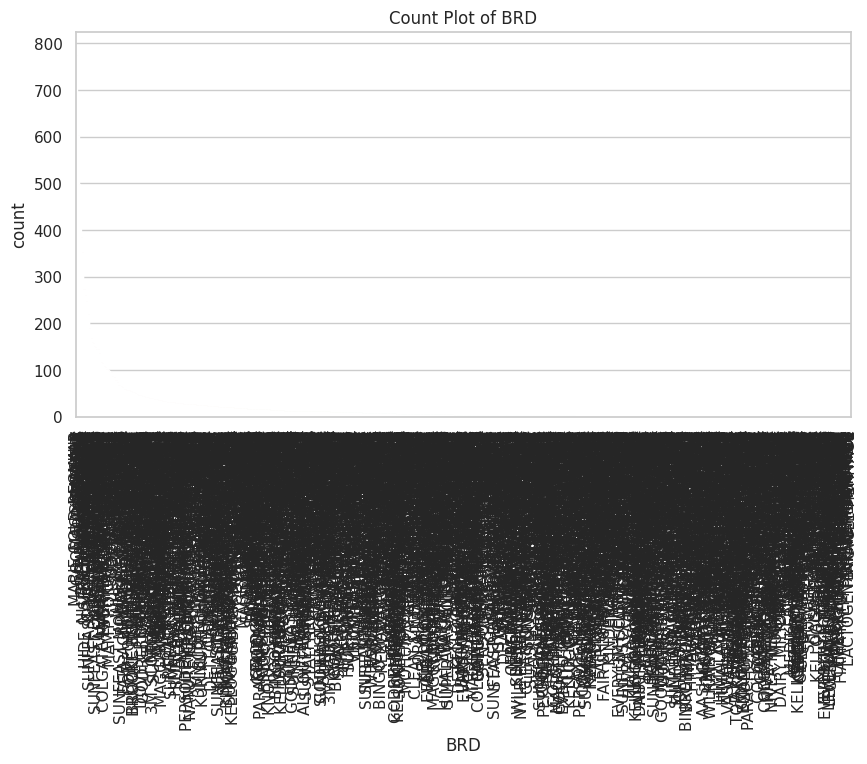

In [14]:
# Univariate Analysis for Categorical Columns
categorical_cols = ['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()


# 5. Bivariate Analysis

In bivariate analysis, we will explore relationships between pairs of variables. By computing correlation matrices and creating scatter plots, we can identify significant correlations among numerical columns (e.g., QTY, VALUE). We will also analyze the impact of categorical variables (e.g., GRP, SGRP) on numerical outcomes using box plots and bar charts, providing insights into how different categories affect sales and quantities.

# 6. Multivariate Analysis

This task involves examining relationships between multiple variables simultaneously. We will use pair plots and heatmaps to uncover patterns and interactions that may not be visible in bivariate analysis. Additionally, we will perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, highlighting the most important features that explain the variance in customer behavior.

# 7. Customer Segmentation

Customer segmentation involves grouping customers based on their purchasing behavior. We will apply clustering techniques such as K-means to segment customers using features like purchase frequency and average bill amount. Each customer segment will be analyzed and profiled to understand distinct behavior patterns, which can help in tailoring marketing strategies and improving customer targeting.

# 8. Time Series Analysis

Time series analysis focuses on analyzing data points collected or recorded at specific time intervals. We will plot sales data over time to identify trends and seasonal patterns. By aggregating data by month or quarter, we can observe periodic trends. Additionally, time series decomposition will be used to separate the data into trend, seasonal, and residual components, providing deeper insights into sales dynamics.

# 9. Visualization

In this step, we will create a variety of visualizations to effectively communicate key insights from our analysis. This includes line plots for temporal trends, bar charts for categorical comparisons, and heatmaps for correlation analysis. We will also develop interactive dashboards to facilitate dynamic exploration and presentation of the data.


# 10. Insight Generation and Reporting

The goal of this task is to derive actionable insights from the EDA. By analyzing customer purchasing patterns, preferences, and behavior, we will provide strategic recommendations. These recommendations may include optimizing inventory management, targeting specific customer segments, and adjusting pricing strategies to enhance overall business performance

Reporting involves compiling the findings from the EDA into a comprehensive document. This report will detail the EDA process, key insights, and strategic recommendations. Additionally, we will prepare a presentation to effectively communicate the results and actionable strategies to stakeholders, ensuring that they understand the implications of the analysis for business decision-making.